In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('University.csv')

In [3]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
df.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
from sklearn.preprocessing import StandardScaler 

In [7]:
num_vars = df.select_dtypes(include='number').columns
num_vars

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [8]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [9]:
stdsc = StandardScaler()

ndf = pd.DataFrame(
    stdsc.fit_transform(df[num_vars]),
    columns=num_vars,
    index=df.index
)

In [10]:
ndf.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [11]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters = 5)

In [13]:
km.fit(ndf)

D:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "D:\Anaconda\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [14]:
labels = pd.Series(km.labels_)
labels

0     1
1     2
2     1
3     1
4     1
5     2
6     2
7     1
8     2
9     2
10    2
11    1
12    1
13    3
14    2
15    4
16    2
17    4
18    1
19    1
20    0
21    1
22    1
23    3
24    2
dtype: int32

In [15]:
df.iloc[:,0]

0            Brown
1          CalTech
2              CMU
3         Columbia
4          Cornell
5        Dartmouth
6             Duke
7       Georgetown
8          Harvard
9     JohnsHopkins
10             MIT
11    Northwestern
12       NotreDame
13       PennState
14       Princeton
15          Purdue
16        Stanford
17        TexasA&M
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
23      UWisconsin
24            Yale
Name: Univ, dtype: object

In [16]:
pd.DataFrame( {
    'labels' : km.labels_ , 
    'University' : df.iloc[ : , 0]
})

,labels,University
0,1,Brown
1,2,CalTech
2,1,CMU
3,1,Columbia
4,1,Cornell
5,2,Dartmouth
6,2,Duke
7,1,Georgetown
8,2,Harvard
9,2,JohnsHopkins


In [17]:
km.inertia_

36.38968255748936

In [18]:
error = []

for i in range(1,25):

    km = KMeans(n_clusters= i , random_state=2024)
    km.fit(ndf)
    error.append(km.inertia_)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [19]:
error

[150.0,
 64.47316262551324,
 45.07934922478072,
 38.44076490211227,
 28.531743735385618,
 22.672206496052254,
 19.979613268847828,
 17.812831202086073,
 15.611342655008656,
 13.264956625448441,
 10.572363398244017,
 7.857054325836139,
 5.902633345017238,
 4.790728955345251,
 3.7799494176663626,
 2.785374382514716,
 2.1018481097450255,
 1.5839118237463787,
 1.1910083984238669,
 0.8787408802658244,
 0.5641690012379472,
 0.3427234007938229,
 0.21063945827587505,
 0.08121580048421675]

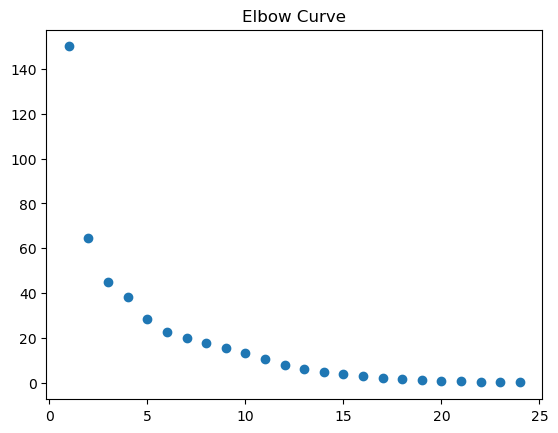

In [20]:
plt.plot(range(1,25), error , 'o')
plt.title('Elbow Curve')
plt.show()

## We can see through graph and the no. of universtities we have, we select K=5

In [21]:
km = KMeans(n_clusters = 5)
km.fit(ndf)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [22]:
df['Cluster'] = km.labels_
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [23]:
df.groupby(['Cluster'])['Expenses'].mean()

Cluster
0    14647.000
1     9953.000
2    25956.375
3    33878.750
4    61133.000
Name: Expenses, dtype: float64

In [24]:
df.groupby(['Cluster'])['Expenses'].max()

Cluster
0    15470
1    11857
2    38380
3    43514
4    63575
Name: Expenses, dtype: int64

In [26]:
df.groupby(['Cluster'])['Expenses'].min()

Cluster
0    13349
1     8704
2    15140
3    22704
4    58691
Name: Expenses, dtype: int64

In [28]:
df['Cluster'].value_counts()

Cluster
3    8
2    8
1    4
0    3
4    2
Name: count, dtype: int64

### Universities With Highest Expenses

In [27]:
df[df['Cluster']==3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
8,Harvard,1400,91,14,11,39525,97,3
10,MIT,1380,94,30,10,34870,91,3
14,Princeton,1375,91,14,8,30220,95,3
16,Stanford,1360,90,20,12,36450,93,3
24,Yale,1375,95,19,11,43514,96,3
